In [6]:
import pandas as pd
import numpy as np
import pylab as pl
import geopandas as gpd
%pylab inline
import statsmodels.formula.api as smf
from scipy import stats as st
import geopandas as gpd

Populating the interactive namespace from numpy and matplotlib


## Hospital Data

In [7]:
health= pd.read_csv('NYC_Health_and_Hospitals_Corporation_Facilities.csv')

In [8]:
health.head()

,Facility Type,Borough,Facility Name,Cross Streets,Phone,Location 1,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,Child Health Center,Queens,Elmhurst Hospital Center,NaN,718-334-4000,"79 01\nElmhurst, NY 11373\n(40.73871040256307,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nursing Home,Manhattan,Gouverneur Healthcare Services,NaN,212-238-7000,"227 Madison Street\nNew York, NY 10002\n(40.71...",10002.0,40.712784,-73.988417,3.0,1.0,6.0,1003224.0,1.002700e+09,Lower East Side ...
2,Nursing Home,Manhattan,Coler-Goldwater Specialty Hospital and Nursing...,NaN,212-318-8000,"1 Main St Roosevelt Island\nNew York, NY 10044...",10044.0,40.756368,-73.956054,8.0,5.0,23801.0,1085548.0,1.013730e+09,Lenox Hill-Roosevelt Island ...
3,Nursing Home,Manhattan,Coler-Goldwater Specialty Hospital and Nursing...,NaN,212-848-6000,"900 Main Street Roosevelt Island\nNew York, NY...",10044.0,40.769800,-73.941218,8.0,5.0,23802.0,1040750.0,1.013730e+09,Lenox Hill-Roosevelt Island ...
4,Diagnostic & Treatment Center,Manhattan,Gouverneur Healthcare Services,NaN,212-238-7000,"227 Madison Street\nNew York, NY 10002\n(40.71...",10002.0,40.712784,-73.988417,3.0,1.0,6.0,1003224.0,1.002700e+09,Lower East Side ...


In [9]:
health.columns

Index(['Facility Type', 'Borough', 'Facility Name', 'Cross Streets', 'Phone',
       'Location 1', 'Postcode', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [10]:
health = health.groupby(health.Postcode).count()

In [11]:
health.head()

,Facility Type,Borough,Facility Name,Cross Streets,Phone,Location 1,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
Postcode,,,,,,,,,,,,,,
10002.0,4,4,4,1,4,4,4,4,4,4,4,4,4,4
10012.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1
10016.0,2,2,2,0,2,2,2,2,2,2,2,2,2,2
10027.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1
10029.0,2,2,2,0,2,2,2,2,2,2,2,2,2,2


In [12]:
health['ZIP']= health.index

In [13]:
health = health.drop(['Borough', 'Facility Name', 'Cross Streets', 'Phone',
       'Location 1', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],axis=1)

## MTA Data

In [14]:
mta= pd.read_csv('stationZip.csv')
del mta['Unnamed: 0']

In [15]:
mta.head()

,Station_Longitude,Station_Name,Station_Latitude,lonlat,ZIPCODE
0,-73.912034,Ditmars Blvd,40.775036,"(-73.912033999999991, 40.775036)",11105
1,-73.912034,Ditmars Blvd,40.775036,"(-73.912033999999991, 40.775036)",11105
2,-73.912034,Ditmars Blvd,40.775036,"(-73.912033999999991, 40.775036)",11105
3,-73.912034,Ditmars Blvd,40.775036,"(-73.912033999999991, 40.775036)",11105
4,-73.917843,Astoria Blvd-Hoyt Av,40.770258,"(-73.917843000000005, 40.770257999999998)",11103


In [16]:

mta= mta.drop_duplicates(subset=['lonlat'])
mta = mta.groupby(mta.ZIPCODE).count()

In [17]:
mta = mta.drop(['Station_Longitude','Station_Latitude','lonlat'],axis=1)
mta['ZIP'] = mta.index

## School Data

In [18]:
school = pd.read_csv('schoolFinal.csv')

In [19]:
school.head()

,BEDS CODE,School Name,County,School Type,Homeless Students,Borough,Zipcode,Latitude,Longitude
0,310100861031,manhattan charter school ii,new york,charter school,32,manhattan,10002,40.713378,-73.986216
1,310200860819,john v lindsay wildcat acad charter,new york,charter school,35,manhattan,10004,40.705531,-74.015977
2,310200860992,broome st academy charter high schoo,new york,charter school,40,manhattan,10013,40.724120,-74.005143
3,310300860804,sisulu-walker charter school,new york,charter school,43,manhattan,10026,40.802098,-73.951359
4,310300860871,opportunity charter school,new york,charter school,35,manhattan,10026,40.801583,-73.955494


In [20]:
school.columns

Index(['BEDS CODE', 'School Name', 'County', 'School Type',
       'Homeless Students', 'Borough', 'Zipcode', 'Latitude', 'Longitude'],
      dtype='object')

In [21]:
school = school.groupby(school.Zipcode).count()
school['ZIP'] = school.index

In [22]:
school = school.drop(['BEDS CODE', 'County', 'School Type',
       'Homeless Students', 'Borough', 'Latitude', 'Longitude'],axis=1)

## Zip and Rent Data

In [23]:
rent = pd.read_csv('Census tract data.csv')

In [24]:
rent.head()

,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,INTPTLAT10,INTPTLON10,State,COUNTY,HH_COUNT,...,MSMOC_TOT_,TAX_RET,Avg_TransC,REtaxperow,DISP_INC,energy_cos,REtax_ACS,AVG_TTL,LOCALNAME,Shape_Area
0,0,34,17,32400,34017032400,40.792844,-74.013482,New Jersey,Hudson County,2187,...,22740,2264.889916,4145.566539,4966.370331,12232.00950,1773.280152,7735,5007.444405,West New York Town,0.000036
1,1,34,17,10100,34017010100,40.691559,-74.110913,New Jersey,Hudson County,2255,...,27804,2363.430717,5969.286255,4490.984109,22077.84024,1876.844806,7917,6146.888195,Bayonne City,0.000106
2,2,34,17,10200,34017010200,40.682103,-74.104573,New Jersey,Hudson County,1218,...,28068,1260.718928,6014.489564,3339.224580,20488.60531,2167.175106,7692,6193.436421,Bayonne City,0.000031
3,3,34,17,10300,34017010300,40.672439,-74.081016,New Jersey,Hudson County,1093,...,22620,1229.562591,4798.787758,3793.386763,15514.61337,2163.964082,7831,4941.564294,Bayonne City,0.000108
4,4,34,17,10400,34017010400,40.670599,-74.089940,New Jersey,Hudson County,1571,...,20724,2209.874484,7611.970058,4478.110461,35131.00534,2114.480847,7918,7838.446154,Bayonne City,0.000234


In [25]:
zdata= pd.read_csv('ZIP_TRACT_122016.csv')

In [36]:
census = pd.merge(rent, zdata, left_on= rent.GEOID10, right_on=zdata.TRACT)

In [37]:
census = census.groupby(census.ZIP).mean()

In [38]:
census.head()

,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,INTPTLAT10,INTPTLON10,HH_COUNT,OHU_OWN,OHU_RENT,...,REtax_ACS,AVG_TTL,Shape_Area,Unnamed: 0,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
ZIP,,,,,,,,,,,,,,,,,,,,,
501,4351.0,36.0,103.0,158607.0,3.610316e+10,40.817951,-73.038977,1187.0,777.00,297.00,...,4594.00,8449.026580,0.000302,0.0,501.0,3.610316e+10,0.00,1.00,0.00,1.00
6018,5078.0,9.0,5.0,260200.0,9.005260e+09,42.022215,-73.295716,1400.0,1082.00,443.00,...,3096.00,4884.121737,0.005482,6842.0,6018.0,9.005260e+09,1.00,1.00,1.00,1.00
6021,5061.0,9.0,5.0,293100.0,9.005293e+09,42.005373,-73.063732,589.0,515.00,39.00,...,4365.00,8451.311420,0.009266,6848.0,6021.0,9.005293e+09,1.00,1.00,1.00,1.00
6024,5078.0,9.0,5.0,260200.0,9.005260e+09,42.022215,-73.295716,1400.0,1082.00,443.00,...,3096.00,4884.121737,0.005482,6853.0,6024.0,9.005260e+09,1.00,1.00,1.00,1.00
6031,5082.0,9.0,5.0,302525.0,9.005303e+09,41.958324,-73.321931,1256.0,922.75,337.25,...,3814.25,9355.857836,0.014450,6867.5,6031.0,9.005303e+09,0.25,0.25,0.25,0.25


In [39]:
#census = pd.DataFrame(census)

In [40]:
#census = census.groupby(census['ZIP']).mean()

In [41]:
census['ZIP'] = census.index

In [42]:
census = census.drop(['FID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'INTPTLAT10',
       'INTPTLON10', 'HH_COUNT', 'OHU_OWN', 'OHU_RENT', 'PERC_OWN',
       'PERC_RENT', 'MED_VAL', 'HOUSINGCOS', 'MCR_ANNUAL', 'MSMOC_TOT_',
       'TAX_RET', 'Avg_TransC', 'REtaxperow', 'DISP_INC', 'energy_cos',
       'REtax_ACS', 'AVG_TTL', 'Shape_Area', 'Unnamed: 0', 'TRACT',
       'RES_RATIO', 'BUS_RATIO', 'OTH_RATIO', 'TOT_RATIO'],axis=1)

In [43]:
census.head()

,MHI,ZIP
ZIP,,
501,73889.0,501
6018,46417.0,6018
6021,72000.0,6021
6024,46417.0,6024
6031,64755.5,6031


## PUMA and LEHD

In [44]:
puma = pd.read_csv('tract-puma.csv')

In [45]:
puma.head()

,STATEFP,COUNTYFP,TRACTCE,PUMA5CE
0,1,1,20100,2100
1,1,1,20200,2100
2,1,1,20300,2100
3,1,1,20400,2100
4,1,1,20500,2100


In [46]:
lehd = pd.read_csv('LEHD_CT_jobs.csv')

In [47]:
lehd.head()

,OBJECTID,ct2010,Job_Count,Join_Count,TARGET_FID,shape_leng,puma,boro_code,ntaname,ctlabel,...,cdeligibil,ntacode,id,Shape_Le_1,Shape_Area,FID_,OBJECTID_1,Shape_Le_2,Shape_Ar_1,Join_Cou_1
0,1,900,181.0,0,0,7729.016794,3903,5,West New Brighton-New Brighton-St. George,9.0,...,I,SI22,NaN,0.025216,2.497010e+06,0,1,0.025216,0.000025,7
1,2,9800,10918.0,10,1,5534.199811,3808,1,Turtle Bay-East Midtown,98.0,...,I,MN19,3.606101e+14,0.017766,1.906016e+06,1,2,0.017766,0.000019,10
2,3,10000,38334.0,14,2,5692.168737,3808,1,Turtle Bay-East Midtown,100.0,...,I,MN19,3.606101e+14,0.017838,1.860938e+06,2,3,0.017838,0.000018,14
3,4,10200,44872.0,14,3,5687.802439,3807,1,Midtown-Midtown South,102.0,...,I,MN17,3.606101e+14,0.017826,1.860993e+06,3,4,0.017826,0.000018,14
4,5,10400,48083.0,9,4,5693.036367,3807,1,Midtown-Midtown South,104.0,...,I,MN17,3.606101e+14,0.017849,1.864600e+06,4,5,0.017849,0.000018,9


In [48]:
lehd_puma = pd.merge(puma, lehd, left_on=puma.PUMA5CE, right_on=lehd.puma)

In [49]:
lehd_puma.head()

,STATEFP,COUNTYFP,TRACTCE,PUMA5CE,OBJECTID,ct2010,Job_Count,Join_Count,TARGET_FID,shape_leng,...,cdeligibil,ntacode,id,Shape_Le_1,Shape_Area,FID_,OBJECTID_1,Shape_Le_2,Shape_Ar_1,Join_Cou_1
0,6,37,900102,3701,366,28700,1044.0,0,365,5236.720767,...,I,BX29,NaN,0.016692,1.670599e+06,365,366,0.016692,0.000017,8
1,6,37,900102,3701,368,30100,575.0,0,367,5128.741281,...,I,BX29,NaN,0.015986,1.583340e+06,367,368,0.015986,0.000016,6
2,6,37,900102,3701,384,40303,279.0,0,383,3875.771291,...,E,BX28,NaN,0.012562,9.491878e+05,383,384,0.012562,0.000009,4
3,6,37,900102,3701,385,40304,283.0,0,384,3459.318920,...,E,BX28,NaN,0.011158,7.233283e+05,384,385,0.011158,0.000007,3
4,6,37,900102,3701,390,40701,167.0,0,389,3907.032701,...,E,BX28,NaN,0.012777,6.305660e+05,389,390,0.012777,0.000006,4


In [50]:
lehd_puma.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'PUMA5CE', 'OBJECTID', 'ct2010',
       'Job_Count', 'Join_Count', 'TARGET_FID', 'shape_leng', 'puma',
       'boro_code', 'ntaname', 'ctlabel', 'boro_ct201', 'boro_name',
       'cdeligibil', 'ntacode', 'id', 'Shape_Le_1', 'Shape_Area', 'FID_',
       'OBJECTID_1', 'Shape_Le_2', 'Shape_Ar_1', 'Join_Cou_1'],
      dtype='object')

In [51]:
lehd_zip = pd.merge(census, lehd_puma, left_on=  , right_on=lehd_puma.TRACTCE)

SyntaxError: invalid syntax (<ipython-input-51-f2d8eec59726>, line 1)

In [ ]:
lehd_zip.head()

In [ ]:
lehd_puma['TRACTCE'].unique()

## Analysis

In [52]:
len(census),len(mta),len(health),len(school)

(1490, 121, 38, 65)

In [53]:
temp = pd.merge(census, mta, left_on=census.ZIP, right_on=mta.ZIP)

In [54]:
temp.head()

,MHI,ZIP_x,Station_Name,ZIP_y
0,93396.583333,10001,6,10001
1,42001.222222,10002,5,10002
2,93893.846154,10003,7,10003
3,81765.000000,10004,3,10004
4,116870.333333,10005,2,10005


In [55]:
del temp['ZIP_y']
temp = temp.rename(columns={'ZIP_x': 'ZIP'})

In [56]:
temp1 = pd.merge(temp, health, left_on=temp.ZIP, right_on=health.ZIP)

In [57]:
del temp1['ZIP_y']
temp1 = temp1.rename(columns={'ZIP_x': 'ZIP'})

In [58]:
final = pd.merge(temp1, school, left_on= temp1.ZIP, right_on=school.ZIP)

In [59]:
del final['ZIP_y']
final = final.rename(columns={'ZIP_x': 'ZIP'})
final

,MHI,ZIP,Station_Name,Facility Type,School Name
0,42001.222222,10002,5,4,1
1,42177.285714,10027,3,1,3
2,35646.437500,10029,2,2,7
3,33303.750000,10030,2,1,2
4,37663.250000,10034,3,1,1
5,27903.111111,10452,6,2,5
6,22760.666667,10457,3,1,3
7,51818.947368,10461,4,2,4
8,36173.884615,10467,7,2,1
9,88088.636364,11201,11,1,3


In [60]:
final['score']=0

In [61]:
final

,MHI,ZIP,Station_Name,Facility Type,School Name,score
0,42001.222222,10002,5,4,1,0
1,42177.285714,10027,3,1,3,0
2,35646.437500,10029,2,2,7,0
3,33303.750000,10030,2,1,2,0
4,37663.250000,10034,3,1,1,0
5,27903.111111,10452,6,2,5,0
6,22760.666667,10457,3,1,3,0
7,51818.947368,10461,4,2,4,0
8,36173.884615,10467,7,2,1,0
9,88088.636364,11201,11,1,3,0


In [62]:
for i in range(len(final)):
    if 35826>int(final.MHI[i])>=22760 :
        final.score[i]+=1
    elif 48891>int(final.MHI[i])>=35827:
        final.score[i]+=2
    elif 61956>int(final.MHI[i])>=48892:
        final.score[i]+=3
    elif 75021>int(final.MHI[i])>=61957:
        final.score[i]+=4
    elif 88090>int(final.MHI[i])>=75022:
        final.score[i]+=5
    else:
        score[i]+=0

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3

In [63]:
for i in range(len(final)):
    if 4>int(final.Station_Name[i])>=2 :
        final.score[i]+=1
    elif 6>int(final.Station_Name[i])>=4:
        final.score[i]+=2
    elif 8>int(final.Station_Name[i])>=6:
        final.score[i]+=3
    elif 10>int(final.Station_Name[i])>=8:
        final.score[i]+=4
    elif 12>int(final.Station_Name[i])>=10:
        final.score[i]+=5
    elif 14>int(final.Station_Name[i])>=12:
        final.score[i]+=6
    else:
        score[i]+=0

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3

In [64]:
for i in range(len(final)):
    if 2>int(final['Facility Type'][i])>=1 :
        final.score[i]+=1
    elif 3>int(final['Facility Type'][i])>=2:
        final.score[i]+=2
    elif 4>=int(final['Facility Type'][i])>=3:
        final.score[i]+=3
    else:
        score[i]+=0

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [65]:
for i in range(len(final)):
    if 2>int(final['School Name'][i])>=1:
        final.score[i]+=1
    elif 3>int(final['School Name'][i])>=2:
        final.score[i]+=2
    elif 4>int(final['School Name'][i])>=3:
        final.score[i]+=3
    elif 5>int(final['School Name'][i])>=4:
        final.score[i]+=4
    elif 6>int(final['School Name'][i])>=5:
        final.score[i]+=5
    elif 7>=int(final['School Name'][i])>=6:
        final.score[i]+=6
    else:
        score[i]+=0

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python

In [66]:
lm = smf.ols(formula="final.score ~ final['MHI']  + final['Station_Name'] + final['Facility Type'] + final['School Name']", data=final).fit()

In [67]:
lm.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final.score   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     141.0
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           3.83e-11
Time:                        19:04:15   Log-Likelihood:                -11.648
No. Observations:                  19   AIC:                             33.30
Df Residuals:                      14   BIC:                             38.02
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -0.7523      0.499     -1.509      0.154        -1.822     0.317
final['MHI']            6.931e-05   9.63e-06      7.194      0.000      4.86e-05     9e-05
final['Station_Name']      0.5030      0.047     10.644      0.000         0.402     0.604
final['Facility Type']     0.7061      0.141      5.025      0.000         0.405     1.007
final['School Name']       0.9255      0.073     12.687      0.000         0.769     1.082
==============================================================================
Omnibus:                        1.415   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                0.767
Skew:                           0.491   Prob(JB):                        0.682
Kurtosis:                       2.933   Cond. No.                     1.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
lm.predict()

array([  8.423644  ,   7.16257881,  10.61485592,   5.11905957,
         4.99876379,  10.23929626,   5.81680901,   9.96539549,
         7.61367219,  14.36886014,   5.0304482 ,  12.43404146,
        13.02111824,   7.01493022,   8.47574363,   8.04084189,
         4.79483584,   6.175051  ,   5.69005434])

In [82]:
final['predicted_score'] = lm.predict()

In [70]:
shp = gpd.GeoDataFrame.from_file('ZIP_CODE_040114.shp')

In [71]:
shp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [83]:
final

,MHI,ZIP,Station_Name,Facility Type,School Name,score,predicted score,predicted_score
0,42001.222222,10002,5,4,1,8,8.423644,8.423644
1,42177.285714,10027,3,1,3,7,7.162579,7.162579
2,35646.437500,10029,2,2,7,10,10.614856,10.614856
3,33303.750000,10030,2,1,2,5,5.119060,5.119060
4,37663.250000,10034,3,1,1,5,4.998764,4.998764
5,27903.111111,10452,6,2,5,11,10.239296,10.239296
6,22760.666667,10457,3,1,3,6,5.816809,5.816809
7,51818.947368,10461,4,2,4,11,9.965395,9.965395
8,36173.884615,10467,7,2,1,8,7.613672,7.613672
9,88088.636364,11201,11,1,3,14,14.368860,14.368860


In [84]:
sfile = pd.merge(shp, final, left_on=shp.ZIPCODE, right_on= final.ZIP)

In [78]:
shp.ZIPCODE = shp.ZIPCODE.astype(int)

In [77]:
type(final.ZIP[0])

numpy.int64

In [85]:
sfile

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,SHAPE_LEN,geometry,MHI,ZIP,Station_Name,Facility Type,School Name,score,predicted score,predicted_score
0,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",34721.000000,11213,3,1,1,4,4.794836,4.794836
1,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",34238.633333,11212,4,1,4,8,8.040842,8.040842
2,10467,0,Bronx,97932.0,6.933617e+07,NY,Bronx,36,005,http://www.usps.com/,...,0.0,"POLYGON ((1017396.305742651 265444.4701448828,...",36173.884615,10467,7,2,1,8,7.613672,7.613672
3,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,...,0.0,"POLYGON ((1006203.169008225 257345.6566181332,...",37663.250000,10034,3,1,1,5,4.998764,4.998764
4,10461,0,Bronx,50549.0,6.282406e+07,NY,Bronx,36,005,http://www.usps.com/,...,0.0,"POLYGON ((1029230.779448971 251468.9475710541,...",51818.947368,10461,4,2,4,11,9.965395,9.965395
5,10457,0,Bronx,70253.0,3.764061e+07,NY,Bronx,36,005,http://www.usps.com/,...,0.0,"POLYGON ((1011926.555855393 251674.4530655444,...",22760.666667,10457,3,1,3,6,5.816809,5.816809
6,10452,0,Bronx,76104.0,2.755039e+07,NY,Bronx,36,005,http://www.usps.com/,...,0.0,"POLYGON ((1004143.552392557 247257.782108888, ...",27903.111111,10452,6,2,5,11,10.239296,10.239296
7,10030,0,New York,26720.0,7.757661e+06,NY,New York,36,061,http://www.usps.com/,...,0.0,"POLYGON ((1001899.622497231 238190.4104798883,...",33303.750000,10030,2,1,2,5,5.119060,5.119060
8,10027,0,New York,58639.0,2.469528e+07,NY,New York,36,061,http://www.usps.com/,...,0.0,"POLYGON ((998641.2454838157 236978.8715643883,...",42177.285714,10027,3,1,3,7,7.162579,7.162579
9,10029,0,New York,77503.0,2.296344e+07,NY,New York,36,061,http://www.usps.com/,...,0.0,"POLYGON ((999072.8305786401 230985.3760054708,...",35646.437500,10029,2,2,7,10,10.614856,10.614856


(905410.75604293647,
 1075212.5382562785,
 112386.35181947277,
 280345.45402395504)

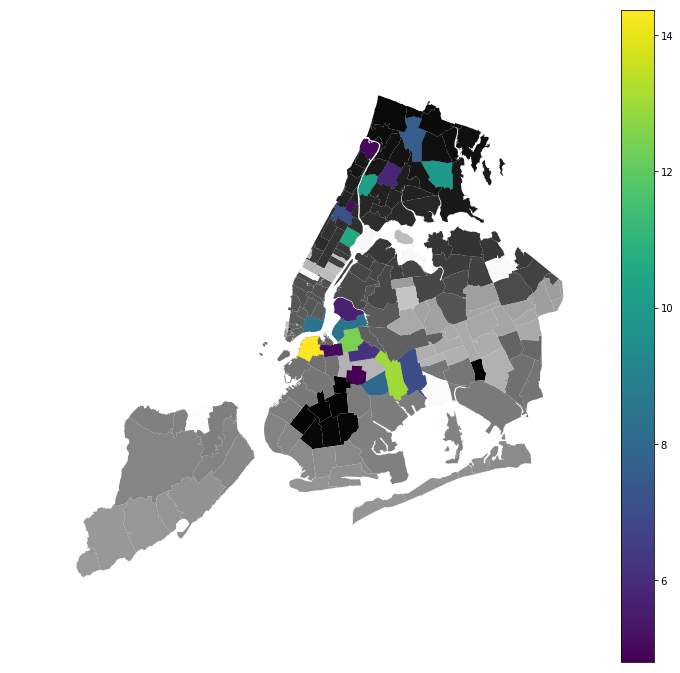

In [95]:
ax=shp.plot(figsize=(12,12),cmap='gray')
ax1=sfile.plot(ax=ax,column='predicted_score', cmap='viridis', legend=True,  figsize=(12,12))
ax.axis('off')

In [98]:
dummy = pd.merge(census, mta, left_on=census.ZIP, right_on=mta.ZIP)

In [99]:
dummy.head()

,MHI,ZIP_x,Station_Name,ZIP_y
0,93396.583333,10001,6,10001
1,42001.222222,10002,5,10002
2,93893.846154,10003,7,10003
3,81765.000000,10004,3,10004
4,116870.333333,10005,2,10005


In [102]:
del dummy['ZIP_y']

In [104]:
dummy = dummy.rename(columns={'ZIP_x':'ZIP'})

In [105]:
dummy.head()

,MHI,ZIP,Station_Name
0,93396.583333,10001,6
1,42001.222222,10002,5
2,93893.846154,10003,7
3,81765.000000,10004,3
4,116870.333333,10005,2


In [106]:
dummy1 = pd.merge(dummy, school, left_on=dummy.ZIP, right_on=school.ZIP)

In [107]:
dummy1.head()

,MHI,ZIP_x,Station_Name,School Name,ZIP_y
0,42001.222222,10002,5,1,10002
1,81765.000000,10004,3,1,10004
2,111220.000000,10006,3,1,10006
3,98291.800000,10013,6,1,10013
4,95213.636364,10024,2,1,10024


In [108]:
del dummy1['ZIP_y']
dummy1 = dummy1.rename(columns={'ZIP_x':'ZIP'})

In [111]:
len(dummy1)

53

In [115]:
dummy1['score']=0

In [116]:
dummy1.head()

,MHI,ZIP,Station_Name,School Name,score
0,42001.222222,10002,5,1,0
1,81765.000000,10004,3,1,0
2,111220.000000,10006,3,1,0
3,98291.800000,10013,6,1,0
4,95213.636364,10024,2,1,0


In [118]:
for i in range(len(dummy1)):
    if 35826>int(dummy1.MHI[i])>=22760 :
        dummy1.score[i]+=1
    elif 48891>int(dummy1.MHI[i])>=35827:
        dummy1.score[i]+=2
    elif 61956>int(dummy1.MHI[i])>=48892:
        dummy1.score[i]+=3
    elif 75021>int(dummy1.MHI[i])>=61957:
        dummy1.score[i]+=4
    elif 88090>int(dummy1.MHI[i])>=75022:
        dummy1.score[i]+=5
    else:
        dummy1.score[i]+=0

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packag

In [119]:
for i in range(len(final)):
    if 4>int(dummy1.Station_Name[i])>=2 :
        dummy1.score[i]+=1
    elif 6>int(dummy1.Station_Name[i])>=4:
        dummy1.score[i]+=2
    elif 8>int(dummy1.Station_Name[i])>=6:
        dummy1.score[i]+=3
    elif 10>int(dummy1.Station_Name[i])>=8:
        dummy1.score[i]+=4
    elif 12>int(dummy1.Station_Name[i])>=10:
        dummy1.score[i]+=5
    elif 14>int(dummy1.Station_Name[i])>=12:
        dummy1.score[i]+=6
    else:
        dummy1.score[i]+=0

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3

In [120]:
for i in range(len(final)):
    if 2>int(dummy1['Facility Type'][i])>=1 :
        dummy1.score[i]+=1
    elif 3>int(dummy1['Facility Type'][i])>=2:
        dummy1.score[i]+=2
    elif 4>=int(dummy1['Facility Type'][i])>=3:
        dummy1.score[i]+=3
    else:
        dummy1.score[i]+=0

KeyError: 'Facility Type'

In [121]:
for i in range(len(final)):
    if 2>int(dummy1['School Name'][i])>=1:
        dummy1.score[i]+=1
    elif 3>int(dummy1['School Name'][i])>=2:
        dummy1.score[i]+=2
    elif 4>int(dummy1['School Name'][i])>=3:
        dummy1.score[i]+=3
    elif 5>int(dummy1['School Name'][i])>=4:
        dummy1.score[i]+=4
    elif 6>int(dummy1['School Name'][i])>=5:
        dummy1.score[i]+=5
    elif 7>=int(dummy1['School Name'][i])>=6:
        dummy1.score[i]+=6
    else:
        dummy1.score[i]+=0

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python

In [122]:
dummy1.head()

,MHI,ZIP,Station_Name,School Name,score
0,42001.222222,10002,5,1,5
1,81765.000000,10004,3,1,7
2,111220.000000,10006,3,1,2
3,98291.800000,10013,6,1,4
4,95213.636364,10024,2,1,2


In [123]:
shpfile = pd.merge(shp, dummy1, left_on=shp.ZIPCODE, right_on=dummy1.ZIP)

In [124]:
shpfile.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,MHI,ZIP,Station_Name,School Name,score
0,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",34721.000000,11213,3,1,1
1,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",34238.633333,11212,4,4,1
2,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",37717.222222,11225,8,1,2
3,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",45154.964286,11218,3,1,2
4,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,...",39449.241379,11226,7,1,2


(905410.75604293647,
 1075212.5382562785,
 112386.35181947277,
 280345.45402395504)

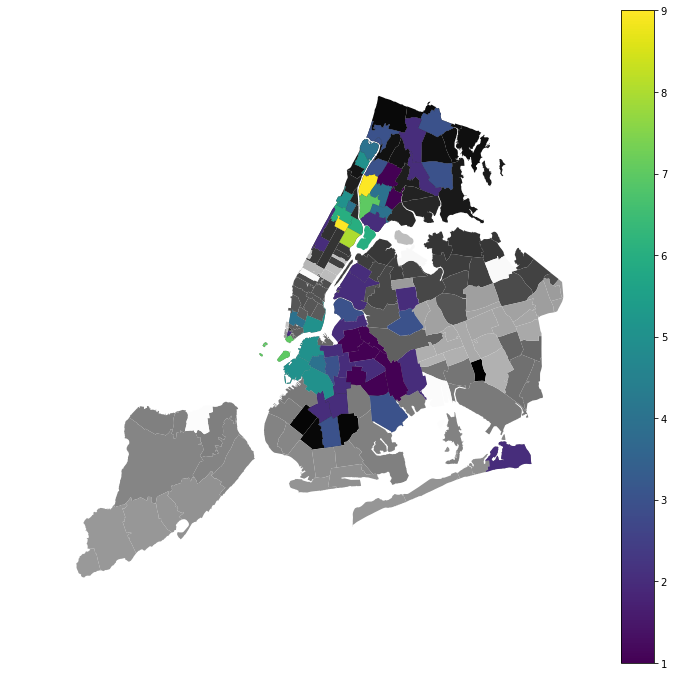

In [131]:
ax=shp.plot(figsize=(12,12),cmap='gray')
ax1=shpfile.plot(ax=ax,column='score', cmap='viridis', legend=True,  figsize=(12,12))
ax.axis('off')

In [150]:
school_shp = pd.merge(school, shp, left_on=school.ZIP, right_on=shp.ZIPCODE)

In [151]:
school_shp.head()

,School Name,ZIP,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,1,10002,10002,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((991339.8703228086 207576.7837151289,..."
1,1,10004,10004,0,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981197.408652395 196571.0816452205, ..."
2,1,10004,10004,0,New York,2187.0,1.202708e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((972696.8446168154 193014.5477478057,..."
3,1,10004,10004,0,New York,2187.0,7.679616e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((977542.4500830621 188447.2783390433,..."
4,1,10004,10004,0,New York,2187.0,6.707080e+05,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((971218.3702115566 190710.8587856293,..."


(905410.75604293647,
 1075212.5382562785,
 112386.35181947277,
 280345.45402395504)

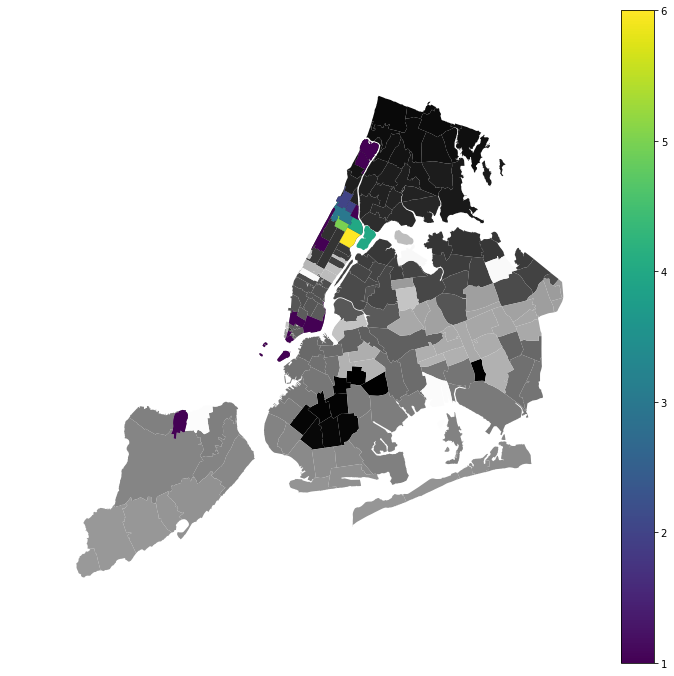

In [159]:
ax2=shp.plot(figsize=(12,12),cmap='gray')
ax3=school_shp.plot(ax=ax2, column='score', legend=True,  figsize=(12,12))
ax2.axis('off')

In [154]:
for i in range(len(final)):
    if 2>int(school_shp['School Name'][i])>=1:
        school_shp.score[i]+=1
    elif 3>int(school_shp['School Name'][i])>=2:
        school_shp.score[i]+=2
    elif 4>int(school_shp['School Name'][i])>=3:
        school_shp.score[i]+=3
    elif 5>int(school_shp['School Name'][i])>=4:
        school_shp.score[i]+=4
    elif 6>int(school_shp['School Name'][i])>=5:
        school_shp.score[i]+=5
    elif 7>=int(school_shp['School Name'][i])>=6:
        school_shp.score[i]+=6
    else:
        school_shp.score[i]+=0

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python

In [153]:
school_shp['score']=0

In [155]:
school_shp=school_shp[school_shp.score>0]

In [158]:
type(school_shp)

geopandas.geodataframe.GeoDataFrame

In [142]:
type(shp)

geopandas.geodataframe.GeoDataFrame

In [157]:
school_shp = gpd.GeoDataFrame(school_shp)

In [160]:
!curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nysd_17d.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  760k  100  760k    0     0   760k      0  0:00:01 --:--:--  0:00:01 5353k


In [166]:
!unzip nysd_17d.zip 

Archive:  nysd_17d.zip
  inflating: nysd_17d/nysd.shp       
  inflating: nysd_17d/nysd.dbf       
  inflating: nysd_17d/nysd.shx       
  inflating: nysd_17d/nysd.prj       
  inflating: nysd_17d/nysd.shp.xml   


In [173]:
school_file= gpd.GeoDataFrame.from_file('nysd.shp')

In [175]:
shelter = pd.read_excel('shelter_geocode.xlsx')

In [176]:
shelter.to_csv('shelter.csv')

In [177]:
shelter = pd.read_csv('shelter.csv')

In [179]:
del shelter['Unnamed: 0']

In [182]:
shelter.head()

,name,boro,zip,link,state,Street_Address,latlon
0,Center Against Domestic Violence,Brooklyn,11201,https://www.homelessshelterdirectory.org/cgi-b...,NY,"25 Chapel Street Suite 904\nBrooklyn, NY 11201","40.6973327,-73.9882402"
1,Tillary Street Women's Shelter,Brooklyn,11201,https://www.homelessshelterdirectory.org/cgi-b...,NY,"200 Tillary Street\nBrooklyn, NY 11201","40.6956306,-73.984361"
2,Bowery Mission,New York City,10002,https://www.homelessshelterdirectory.org/cgi-b...,NY,"227 Bowery\nNew York City, NY 10002","40.7219805,-73.995036"
3,New York City Rescue Mission,New York City,10013,https://www.homelessshelterdirectory.org/cgi-b...,NY,"90 Lafayette Street\nNew York City, NY 10013","40.7175399,-74.0038098"
4,3rd Street Men's Shelter,New York,10003,https://www.homelessshelterdirectory.org/cgi-b...,NY,"8 East 3rd Street\nNew York, NY 10003","40.7258632,-73.9931951"


In [181]:
shelter = shelter.rename(columns={'Unnamed: 5':'Street_Address','Unnamed: 6':'latlon'})

In [184]:
shelter_shp = pd.merge(shpfile, shelter, left_on=shpfile.ZIPCODE, right_on=shelter.zip)

In [185]:
shelter_shp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,Station_Name,School Name,score,name,boro,zip,link,state,Street_Address,latlon
0,10452,0,Bronx,76104.0,2.755039e+07,NY,Bronx,36,005,http://www.usps.com/,...,6,5,9,Cromwell Ave Safe Haven Bronx NY,Bronx,10452,https://www.homelessshelterdirectory.org/cgi-b...,NY,"40 West 170th Street\nBronx, NY 10452","40.8408635,-73.9219921"
1,10027,0,New York,58639.0,2.469528e+07,NY,New York,36,061,http://www.usps.com/,...,3,3,6,Harlem United Community AIDS Center,New York City,10027,https://www.homelessshelterdirectory.org/cgi-b...,NY,"123-125 W 124th Street\nNew York City, NY 10027","40.8076998,-73.9491172"
2,10024,0,New York,58521.0,2.287734e+07,NY,New York,36,061,http://www.usps.com/,...,2,1,2,Lalitamba Saranam (Frederick's Place),New York,10024,https://www.homelessshelterdirectory.org/cgi-b...,NY,"P.O. Box 131, Planetarium Station\nNew York, N...",NaN
3,10035,0,New York,34884.0,1.544566e+07,NY,New York,36,061,http://www.usps.com/,...,2,4,6,Charles Gay center,Wards Island,10035,https://www.homelessshelterdirectory.org/cgi-b...,NY,"1 Keener Bldg\nWards Island, NY 10035","40.7852516,-73.9338225"
4,10035,0,New York,34884.0,2.349487e+07,NY,New York,36,061,http://www.usps.com/,...,2,4,6,Charles Gay center,Wards Island,10035,https://www.homelessshelterdirectory.org/cgi-b...,NY,"1 Keener Bldg\nWards Island, NY 10035","40.7852516,-73.9338225"


(905410.75604293647,
 1075212.5382562785,
 112386.35181947277,
 280345.45402395504)

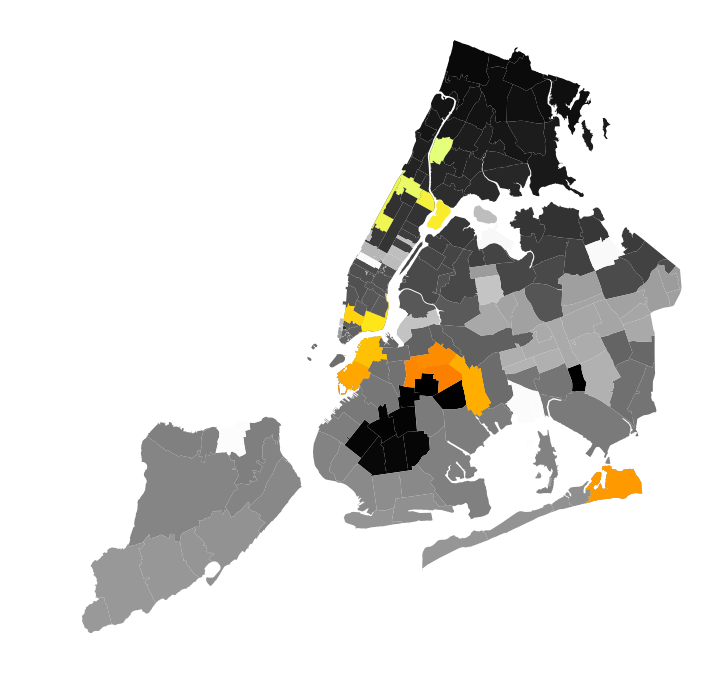

In [195]:
ax=shp.plot(figsize=(12,12),cmap='gray')
#ax1=shpfile.plot(ax=ax,column='score', cmap='viridis', legend=True,  figsize=(12,12))
ax2 = shelter_shp.plot(ax=ax,cmap='Wistia',legend=True)
ax.axis('off')

In [188]:
shelter_shp = gpd.GeoDataFrame(shelter_shp)

In [223]:
shel_sh = pd.read_csv('SL_final_geo.csv')

In [225]:
del shel_sh['Unnamed: 0']

In [227]:
shel_sh = shel_sh.groupby(shel_sh.zip).count()
#shel_sh['counts'] = shel_sh.groupby(shel_sh.zip).count()['name']




In [229]:
shel_sh['counts']= shel_sh['name']
shel_sh['ZIP'] = shel_sh.index

In [230]:
shel_sh.head()

,name,boro,link,state,latlng,lat,lng,counts,ZIP
zip,,,,,,,,,
10001,7,7,7,7,7,7,7,7,10001
10002,3,3,3,3,3,3,3,3,10002
10003,3,3,3,3,3,3,3,3,10003
10004,5,5,5,5,5,5,5,5,10004
10009,3,3,3,3,3,3,3,3,10009


In [233]:
shel_shp = pd.merge(shp, shel_sh, left_on=shp.ZIPCODE, right_on=shel_sh.ZIP)

In [234]:
type(shel_shp)

geopandas.geodataframe.GeoDataFrame

(905410.75604293647,
 1075212.5382562785,
 112386.35181947277,
 280345.45402395504)

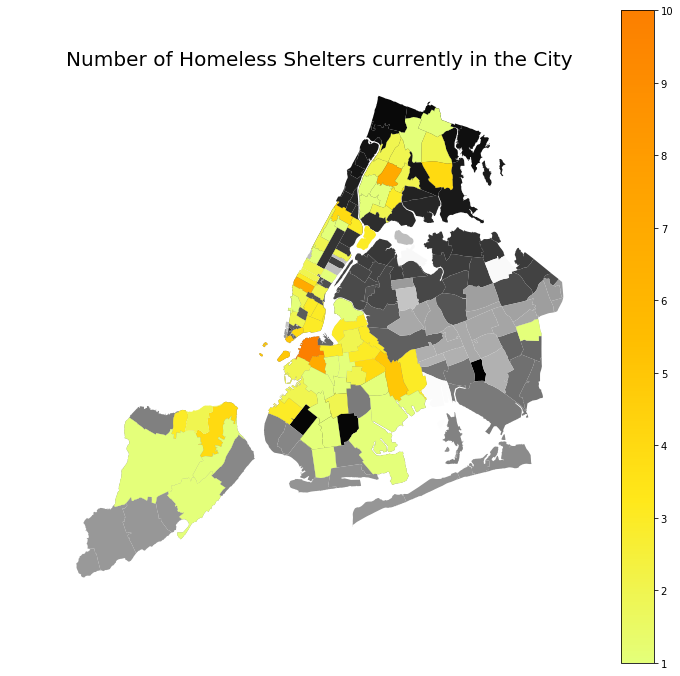

In [236]:
fig, ax = plt.subplots()
ax=shp.plot(figsize=(12,12),cmap='gray')
#ax1=shpfile.plot(ax=ax,column='score', cmap='viridis', legend=True,  figsize=(12,12))
ax2 = shel_shp.plot(column='counts',cmap='Wistia',legend=True)
ax.set_title('Number of Homeless Shelters currently in the City', fontsize=20)
ax.axis('off')

labels = ['{0}, {1}'.format(c, n) for c,n in zip(shel_shp["ZIP"].values, 
                                                 shel_shp["counts"].values)]
tooltip = d3.plugins.PointLabelTooltip(scatter, labels=labels)
d3.plugins.connect(fig, tooltip)
d3.display()

In [237]:
mta.head()

,Station_Name,ZIP
ZIPCODE,,
83,5,83
10001,6,10001
10002,5,10002
10003,7,10003
10004,3,10004


In [238]:
mta_shp = pd.merge(shp, mta, left_on=shp.ZIPCODE, right_on=mta.ZIP)

(905410.75604293647,
 1075212.5382562785,
 112386.35181947277,
 280345.45402395504)

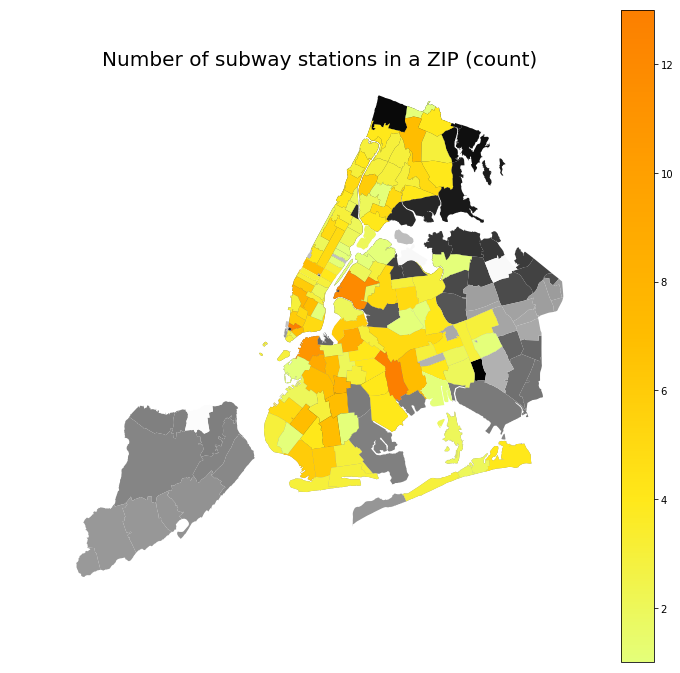

In [242]:
ax=shp.plot(figsize=(12,12),cmap='gray')
#ax1=shpfile.plot(ax=ax,column='score', cmap='viridis', legend=True,  figsize=(12,12))
ax2 = mta_shp.plot(column='Station_Name',ax=ax,cmap='Wistia',legend=True)
ax.set_title('Number of subway stations in a ZIP (count)', fontsize=20)
ax.axis('off')

In [ ]:
#labels = ['{0}, {1}'.format(c, n) for c,n in zip(df_["Country"].values, 
#                                                 df_["Number of mass shootings"].values)]
#tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
#mpld3.plugins.connect(fig, tooltip)
#mpld3.display()

In [243]:
import mpld3

ImportError: No module named 'mpld3'